In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import *

from qiskit.tools.visualization import plot_histogram
from IPython.display import display, Math, Latex

# Decrement

Takes an arbitrary input state $|x\rangle$ on $n$ and takes it to the $|(x-1)\text{mod N}\rangle$, where $N = 2^n$ state in the binary representation, which can be done by applying the following circuit $U$.

Let $|x\rangle$ be an arbitrary state on $n$ qubits,

$$
    \begin{align*}
        U|x\rangle = |(x-1)\text{mod N}\rangle
    \end{align*}
$$

Where $U$ defines an opperation that applies multiple $0$ multi-controlled $X$ gates and flipping the first qubit.

Here we give an example on $n = 3$ qubits.

| Initial State $|x\rangle$              | Final State $U|x\rangle$ |
| ------------- | ------------- |
| $|000\rangle$  | $|111\rangle$  |
| $|001\rangle$  | $|000\rangle$  |
| $|010\rangle$  | $|001\rangle$  |
| $|011\rangle$  | $|010\rangle$  |
| $|100\rangle$  | $|011\rangle$  |
| $|101\rangle$  | $|100\rangle$  |
| $|110\rangle$  | $|101\rangle$  |
| $|111\rangle$  | $|110\rangle$  |

In [2]:
def Decrement(n):
    U = QuantumCircuit(n)
    control = [x for x in range(n-1)]
    for k in range(n-1):
        U.x(control)
        U.mcx(control, control[-1]+1)
        U.x(control)
        control.pop()
    U.x(0)
    
    U = U.to_gate()
    U.name = 'Decrement'
    #ctl_U = U.control() make it a controlled gate
    
    return U

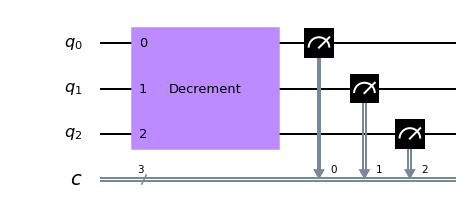

In [3]:
n = 3
mc = QuantumCircuit(n, n)
U = Decrement(n)
mc.append(U, range(n))

mc.measure(range(n), range(n))

backend = BasicAer.get_backend('qasm_simulator')
atp = 1024
res = execute(mc, backend=backend, shots=atp).result()
ans = res.get_counts()

mc.draw('mpl')

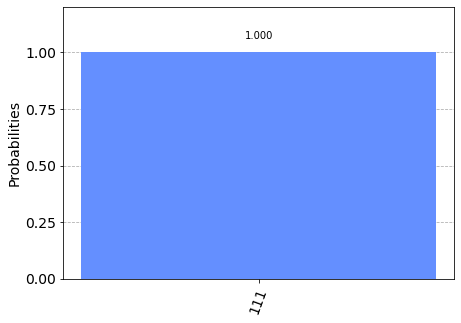

In [4]:
plot_histogram(ans)